# Einführung

In Seaborn können mit `size` und `hue` in verschiedenen Plots zusätzliche Informationen durch die Größe und Farbe der Punkte definiert werden. Seaborn unterscheidet dabei zwischen `categorical` und `numerical`. 

Bei `categorical` werden einfach die vorhanden Kategorien für `size` und `hue` verwendet. 

Bei `numerical` (also numerischen Werten) werden diese automatisch in Kategorien eingeteilt. 
-> Die Anzahl der Einteilung kann hierbei nicht geändert werden!

### Beispiel: mpg dataset

- `hue="origin"` ist `categorical`
- `size="weight"` ist `numeric` und wird automatisch von 1800 bis 4800 eingeteilt

mit `sizes=(40, 400)` wird die minmale und maximale Größe der Punkte definiert

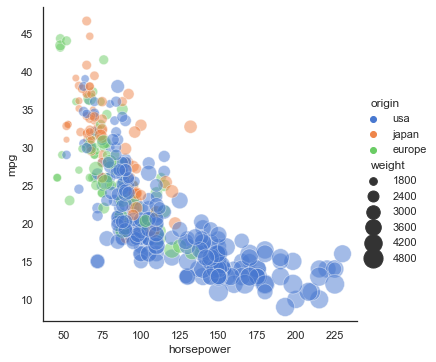

In [28]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=mpg)

### Wie sehen die Werte für `weight` aus?

- Werte zwischen 1613 und 5140 ! 

<AxesSubplot:ylabel='weight'>

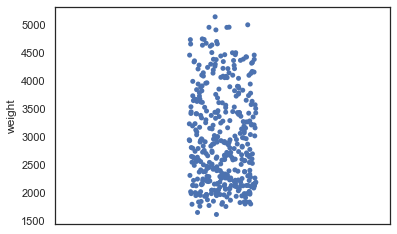

In [36]:
sns.stripplot(data=mpg,y="weight")

In [33]:
mpg["weight"].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

# Kategorien für numerische Daten festlegen

## Weg1 :  `pd.cut` verwenden

Möchte man die Kategorien für `numerical` festlegen, muss man diese selbst als `categorical` definieren

Der leichteste Weg ist die `pandas` Funktion `cut` dafür zu benutzen

***ACHTUNG***: Bei dem Parameter `sizes=(400, 40)` musste die Reihenfolge vertauscht werden damit die Punkte von klein zu groß werden

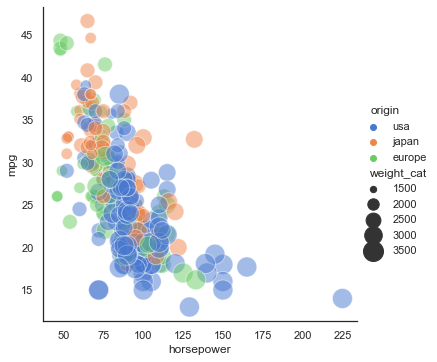

In [72]:
import pandas as pd

# Kategorien erstellen
categories=[0,1500,2000,2500,3000,3500]
cat_label=categories[1:] # beim Label wir der erste Wert entfernt (also hier die 0)
mpg["weight_cat"] = pd.cut(mpg["weight"],categories,labels=cat_label)

# Plot
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",
            sizes=(400, 40), alpha=.5, palette="muted",
            height=5, data=mpg)

## Weg2: selbst definierte Funktion 

1. Definition der Schritte über `cat_steps`
2. Liste `categories` wird erstellt zum Labeln
3. Mit `mpg["weight_cat"] = mpg.apply(categorize, axis=1, args=["weight"])` wird die Funktion auf jede Spalte angewandt, es wird dabei die Spalte die verwendet (`weight`) wird und der Name der neuen Kategorie (`weight_cat`) definiert
4. im Plot wird mit size_order=categories die Reihenfolge festgelegt


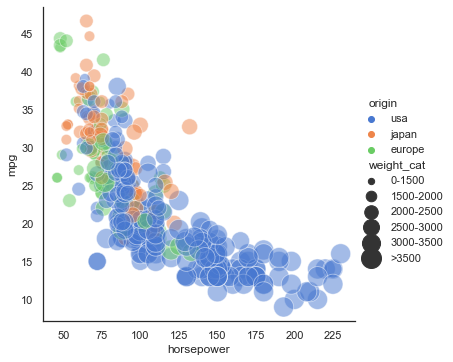

In [74]:
# Schritte der Kategorien
cat_steps=[0,1500,2000,2500,3000,3500] 

# Funktion um in Kategorien einzuteilen
def categorize(row,colname):
    k=-1
    for i in cat_steps:
        k=k+1
        if k < len(cat_steps)-1:
            if (row[colname] >= cat_steps[k]) & (row[colname] < cat_steps[k+1]):
                val = str(cat_steps[k])+"-"+str(cat_steps[k+1])
        else:
            if row[colname] >= cat_steps[k]:
                val = ">"+str(cat_steps[k])
    return val

# Kateogrien erstellen (für Legende)
categories=[]
k=-1
for i in cat_steps:
    k=k+1
    if k < len(cat_steps)-1:
        categories.append(str(cat_steps[k])+"-"+str(cat_steps[k+1]))
    else:
        categories.append(">"+str(cat_steps[k]))


# Neue Kategoriespalte anlegen mit selbst definierter Funktion
mpg["weight_cat"] = mpg.apply(categorize, axis=1, args=["weight"])

                           
# Plot
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",size_order=categories,
            sizes=(400, 40), alpha=.5, palette="muted",
            height=5, data=mpg)
